<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [18]:
#CRIM - per capita crime rate by town

#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#INDUS - proportion of non-retail business acres per town.

#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#NOX - nitric oxides concentration (parts per 10 million)

#RM - average number of rooms per dwelling

#AGE - proportion of owner-occupied units built prior to 1940

#DIS - weighted distances to five Boston employment centres

#RAD - index of accessibility to radial highways

#TAX - full-value property-tax rate per $10,000

#PTRATIO - pupil-teacher ratio by town

#LSTAT - % lower status of the population

#MEDV - Median value of owner-occupied homes in $1000's

In [19]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,36 to 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and above
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,36 to 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,36 to 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,36 to 70


The results show there is minimul correlation here


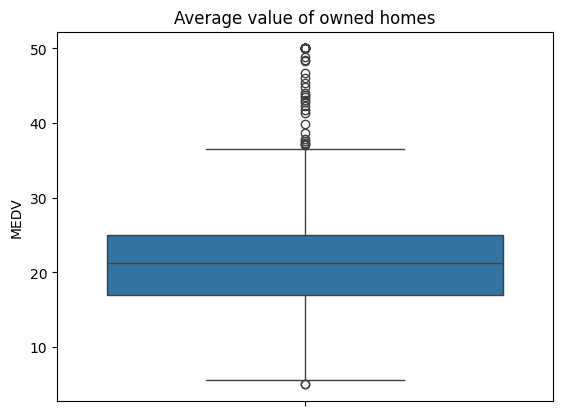

In [60]:
#Bloxplot of the average owned homes
x=sns.boxplot(data=boston_df,y='MEDV')
x.set_title("Average value of owned homes")
print("The results show there is minimul correlation here")

These results show that younger people have more owned homes


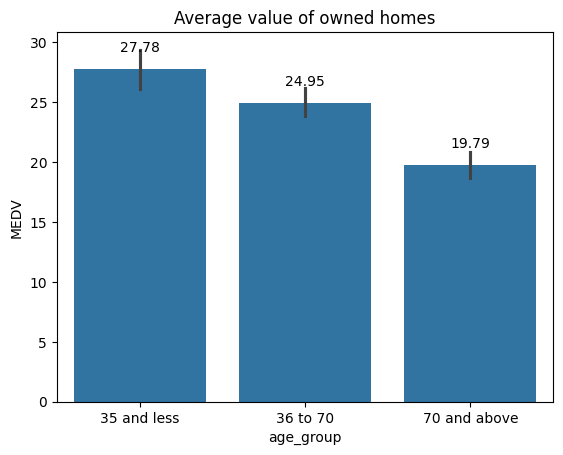

In [63]:
#Boxplot for the MEDV variable vs the AGE variable.
boston_df.loc[(boston_df['AGE']<=35,'age_group')]='35 and less'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='36 to 70'
boston_df.loc[(boston_df['AGE']>=70,'age_group')]='70 and above'

#create the bar plot.
order=['35 and less','36 to 70','70 and above']
x=sns.barplot(data=boston_df,x='age_group',y='MEDV',order=order)
x.set_title("Average value of owned homes")
x.bar_label(x.containers[0],fmt='%.2f',padding=10)

print("These results show that younger people have more owned homes")

<ipython-input-61-ed1ff96e308e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(['Far_from_river', 'Near_river'])


The results show similarities between these two categories but show homes closest to the river have more value


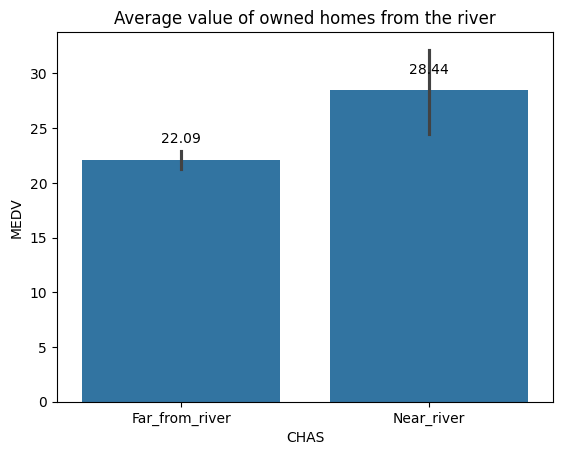

In [61]:
#barplot of homes near the Charles River
x=sns.barplot(data=boston_df,x='CHAS',y='MEDV')
x.set_xticklabels(['Far_from_river', 'Near_river'])
x.set_title("Average value of owned homes from the river")
x.bar_label(x.containers[0],fmt='%.2f',padding=10)

print("The results show similarities between these two categories but show homes closest to the river have more value")

[Text(0.5, 1.0, 'Variation between nitric oxiode and non-retail homes')]

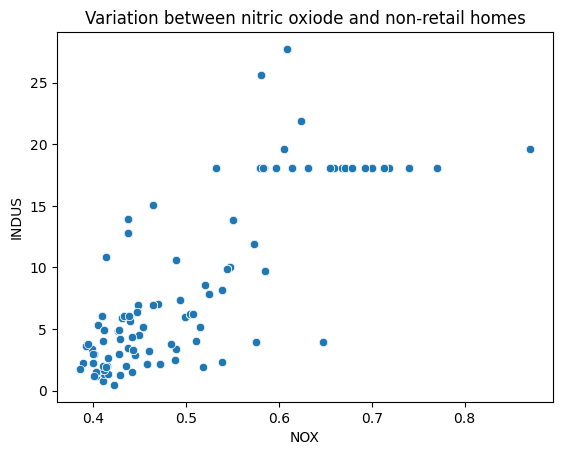

In [35]:
sns.scatterplot(data=boston_df,x='NOX',y='INDUS').set(title="Variation between nitric oxiode and non-retail homes")

print"(

[Text(0.5, 1.0, 'Difference between pupil and teachers')]

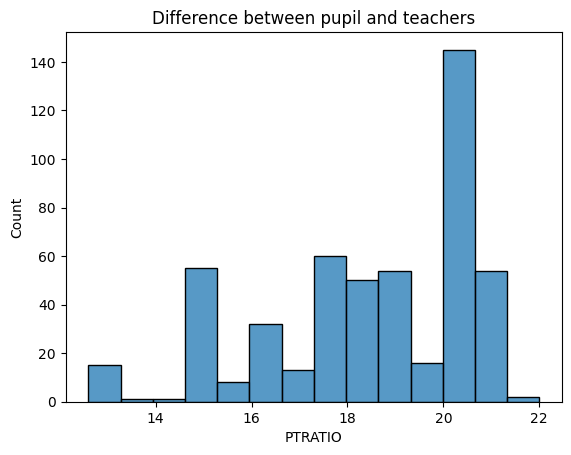

In [39]:
#Histogram of pupil to teacher ratio
sns.histplot(data=boston_df,x='PTRATIO').set(title="Difference between pupil and teachers")
#The average puil to teacher ratio seems to be off and not well alligned throughout. 

In [43]:
print(f"Statistical info on the two groups:\n{boston_df.groupby('CHAS')['MEDV'].describe().round(2)}")
print("CHAS=0- houese far from the river,\nCHAS=1- houses near the river")

#Levene test to check if the 2 group's variance are equal
print("""Null hypothesis: 
The average values of homes near the river and homes far from the river are equal
Alternative hypothesis: The average values of homes differ of the two groups are different""")

lev_stat,lev_p=scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'])
#pvalue=0.032- we reject the null hypothesis, the variances are different
print(f"Levene Result: p-value is {round(lev_p,4)}, we reject the null hypothesis\n")

print("""hypothesis:
The difference between homes close river and homes far from the river isn't big enough
Alternative hypothesis: There is significant difference between houses near the Charles river and houses far from the river in MEDV""")

#T-test to test the difference between the two groups and MEDV
stat,p_val=scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'],equal_var=False)
#pvalue=0.0036- we reject the null hypothesis, the difference in MEDV is significant
print(f"\nt-test Result: p-value is {round(p_val,4)}, we reject the null hypothesis")

Statistical info on the two groups:
      count   mean    std   min   25%   50%    75%   max
CHAS                                                    
0.0   471.0  22.09   8.83   5.0  16.6  20.9  24.80  50.0
1.0    35.0  28.44  11.82  13.4  21.1  23.3  33.15  50.0
CHAS=0- houese far from the river,
CHAS=1- houses near the river
Null hypothesis: 
The average values of homes near the river and homes far from the river are equal
Alternative hypothesis: The average values of homes differ of the two groups are different
Levene Result: p-value is 0.0326, we reject the null hypothesis

hypothesis:
The difference between homes close river and homes far from the river isn't big enough
Alternative hypothesis: There is significant difference between houses near the Charles river and houses far from the river in MEDV

t-test Result: p-value is 0.0036, we reject the null hypothesis


In [45]:
print(f"Statistical info on the 3 AGE groups:\n{boston_df.groupby('age_group')['MEDV'].describe()}\n")

#info on the three AGE groups
low_group=boston_df.loc[(boston_df['age_group']=='35 and less')]['MEDV']
middle_group=boston_df.loc[(boston_df['age_group']=='36 to 70')]['MEDV']
top_group=boston_df.loc[(boston_df['age_group']=='70 and above')]['MEDV']

#ANOVA test to check if the difference between the AGE groups in MEDV
print("""ANOVA test:
Null hypothesis: Samples in all AGE groups are from populations with the same average values 
Alternative hypothesis: The averages of the populations are different""")

f_stat,f_pval=scipy.stats.f_oneway(low_group,middle_group,top_group)
#pvalue=1.7105011022702984e-15 - reject the null hypothesis, the averages of the groups are different
print(f"\nANOVA test result: p-value is {f_pval}, we reject the null hypothesis")

Statistical info on the 3 AGE groups:
              count       mean       std   min     25%   50%     75%   max
age_group                                                                 
35 and less    91.0  27.775824  7.638198  17.1  23.050  24.8  31.150  50.0
36 to 70      128.0  24.947656  6.969370  10.2  20.675  22.6  27.425  50.0
70 and above  287.0  19.793380  9.515375   5.0  13.800  18.2  22.550  50.0

ANOVA test:
Null hypothesis: Samples in all AGE groups are from populations with the same average values 
Alternative hypothesis: The averages of the populations are different

ANOVA test result: p-value is 1.7105011022702984e-15, we reject the null hypothesis


In [54]:
#Pearson correlation test to check if their is a relationship between NOX and INDUS
print("Is there correlation between nitric oxcide and non-retail land?")
print("""Pearson hypothesis:
Null hypothesis: There is no similarities between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative hypothesis: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town""")

Is there correlation between nitric oxcide and non-retail land?
Pearson hypothesis:
Null hypothesis: There is no similarities between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative hypothesis: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town


In [55]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [57]:
#Results above determine there are similarities
print("Pearson correlation result indicate that there is a strong relationship between nitrix oxcide and non-retail land")

Pearson correlation result indicate that there is a strong relationship between nitrix oxcide and non-retail land


In [58]:
#Regression analysis to check the impact
x=boston_df['DIS']
y=boston_df['MEDV']

x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

print(model.summary())
print("\nReject the null hypothesis, p-value equal to 0")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        20:37:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0